In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [5]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [79]:
# build the dataset

block_size = 3
X,Y = [], []

for w in words:
    print(w)
    context = [0]*block_size
    for ch in w+'.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        #print(''.join(itos[i] for i in context), '------->', itos[ix])
        context = context[1:]+[ix]


X = torch.tensor(X)
Y = torch.tensor(Y)

emma
olivia
ava
isabella
sophia
charlotte
mia
amelia
harper
evelyn
abigail
emily
elizabeth
mila
ella
avery
sofia
camila
aria
scarlett
victoria
madison
luna
grace
chloe
penelope
layla
riley
zoey
nora
lily
eleanor
hannah
lillian
addison
aubrey
ellie
stella
natalie
zoe
leah
hazel
violet
aurora
savannah
audrey
brooklyn
bella
claire
skylar
lucy
paisley
everly
anna
caroline
nova
genesis
emilia
kennedy
samantha
maya
willow
kinsley
naomi
aaliyah
elena
sarah
ariana
allison
gabriella
alice
madelyn
cora
ruby
eva
serenity
autumn
adeline
hailey
gianna
valentina
isla
eliana
quinn
nevaeh
ivy
sadie
piper
lydia
alexa
josephine
emery
julia
delilah
arianna
vivian
kaylee
sophie
brielle
madeline
peyton
rylee
clara
hadley
melanie
mackenzie
reagan
adalynn
liliana
aubree
jade
katherine
isabelle
natalia
raelynn
maria
athena
ximena
arya
leilani
taylor
faith
rose
kylie
alexandra
mary
margaret
lyla
ashley
amaya
eliza
brianna
bailey
andrea
khloe
jasmine
melody
iris
isabel
norah
annabelle
valeria
emerson
adalyn
ryl

In [80]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [8]:
C = torch.randn((27, 2))
C

tensor([[ 0.7152, -0.1376],
        [ 1.6865,  0.2033],
        [ 0.4490,  0.6224],
        [ 0.1558,  0.5409],
        [-0.9148,  1.2551],
        [-0.3326,  0.9066],
        [-1.0483,  3.0018],
        [ 1.0994, -0.4193],
        [ 1.5748,  0.5178],
        [-1.1046, -1.0991],
        [-0.8270,  2.7808],
        [-1.5789, -0.2231],
        [-0.5226, -0.0731],
        [ 1.7283, -0.0531],
        [ 2.4094,  0.0475],
        [-0.9177, -0.9642],
        [-1.7398,  0.2320],
        [-1.2215,  0.1011],
        [-1.8097,  0.2452],
        [-0.3418,  0.5709],
        [ 0.1551,  0.2862],
        [ 0.6192,  0.2858],
        [-0.2997,  0.1204],
        [-1.0897,  0.0051],
        [-0.1998, -1.1433],
        [-0.7680, -0.3810],
        [-0.7667,  1.2932]])

In [10]:
C[5] # one way to look up

tensor([-0.3326,  0.9066])

In [12]:
F.one_hot(torch.tensor(5), num_classes=27)

tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0])

In [13]:
F.one_hot(torch.tensor(5), num_classes=27) @ C

RuntimeError: expected m1 and m2 to have the same dtype, but got: long long != float

In [14]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C  

tensor([-0.3326,  0.9066])

In [15]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C  == C[5]

tensor([True, True])

In [16]:
C[[5, 6, 7]]

tensor([[-0.3326,  0.9066],
        [-1.0483,  3.0018],
        [ 1.0994, -0.4193]])

In [17]:
C[torch.tensor([5, 6, 7])]

tensor([[-0.3326,  0.9066],
        [-1.0483,  3.0018],
        [ 1.0994, -0.4193]])

In [18]:
C[X]

tensor([[[ 0.7152, -0.1376],
         [ 0.7152, -0.1376],
         [ 0.7152, -0.1376]],

        [[ 0.7152, -0.1376],
         [ 0.7152, -0.1376],
         [-0.3326,  0.9066]],

        [[ 0.7152, -0.1376],
         [-0.3326,  0.9066],
         [ 1.7283, -0.0531]],

        [[-0.3326,  0.9066],
         [ 1.7283, -0.0531],
         [ 1.7283, -0.0531]],

        [[ 1.7283, -0.0531],
         [ 1.7283, -0.0531],
         [ 1.6865,  0.2033]],

        [[ 0.7152, -0.1376],
         [ 0.7152, -0.1376],
         [ 0.7152, -0.1376]],

        [[ 0.7152, -0.1376],
         [ 0.7152, -0.1376],
         [-0.9177, -0.9642]],

        [[ 0.7152, -0.1376],
         [-0.9177, -0.9642],
         [-0.5226, -0.0731]],

        [[-0.9177, -0.9642],
         [-0.5226, -0.0731],
         [-1.1046, -1.0991]],

        [[-0.5226, -0.0731],
         [-1.1046, -1.0991],
         [-0.2997,  0.1204]],

        [[-1.1046, -1.0991],
         [-0.2997,  0.1204],
         [-1.1046, -1.0991]],

        [[-0.2997,  0

In [19]:
X.shape, C.shape, C[X].shape

(torch.Size([32, 3]), torch.Size([27, 2]), torch.Size([32, 3, 2]))

In [21]:
X[13, 2]

tensor(1)

In [24]:
C[X][13,2]

tensor([1.6865, 0.2033])

In [25]:
C[1]

tensor([1.6865, 0.2033])

In [26]:
# Pytorch indexing is awesome

In [27]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [28]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)


In [29]:
emb @ W1 + b1

RuntimeError: mat1 and mat2 shapes cannot be multiplied (96x2 and 6x100)

In [33]:
emb[:, 0, :].shape

torch.Size([32, 2])

In [35]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape

torch.Size([32, 6])

In [42]:
# neater way to do it than above cell.
torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([32, 6])

In [43]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [44]:
a.shape

torch.Size([18])

In [45]:
a.view(2,9)

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16, 17]])

In [46]:
a.view(9,2)

tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11],
        [12, 13],
        [14, 15],
        [16, 17]])

In [47]:
a.view(3, 3, 2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [48]:
# In pytorch .view is extremely efficient

In [50]:
a.storage() # This is how its stored in computer memory

 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [51]:
emb.view(32, 6)

tensor([[ 0.7152, -0.1376,  0.7152, -0.1376,  0.7152, -0.1376],
        [ 0.7152, -0.1376,  0.7152, -0.1376, -0.3326,  0.9066],
        [ 0.7152, -0.1376, -0.3326,  0.9066,  1.7283, -0.0531],
        [-0.3326,  0.9066,  1.7283, -0.0531,  1.7283, -0.0531],
        [ 1.7283, -0.0531,  1.7283, -0.0531,  1.6865,  0.2033],
        [ 0.7152, -0.1376,  0.7152, -0.1376,  0.7152, -0.1376],
        [ 0.7152, -0.1376,  0.7152, -0.1376, -0.9177, -0.9642],
        [ 0.7152, -0.1376, -0.9177, -0.9642, -0.5226, -0.0731],
        [-0.9177, -0.9642, -0.5226, -0.0731, -1.1046, -1.0991],
        [-0.5226, -0.0731, -1.1046, -1.0991, -0.2997,  0.1204],
        [-1.1046, -1.0991, -0.2997,  0.1204, -1.1046, -1.0991],
        [-0.2997,  0.1204, -1.1046, -1.0991,  1.6865,  0.2033],
        [ 0.7152, -0.1376,  0.7152, -0.1376,  0.7152, -0.1376],
        [ 0.7152, -0.1376,  0.7152, -0.1376,  1.6865,  0.2033],
        [ 0.7152, -0.1376,  1.6865,  0.2033, -0.2997,  0.1204],
        [ 1.6865,  0.2033, -0.2997,  0.1

In [53]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape == torch.cat(torch.unbind(emb, 1), 1).shape == emb.view(32, -1).shape

#torch.cat creates new memory and its inefficient

True

In [55]:
h = torch.tanh(emb.view(-1,6) @ W1 + b1)
h

tensor([[-0.3100, -0.5925, -0.0391,  ...,  0.3741, -0.6740,  0.9882],
        [ 0.5414, -0.9609, -0.9832,  ...,  0.0424,  0.5586,  0.9990],
        [-0.9840,  0.6709,  0.9206,  ..., -0.9879,  0.7389,  0.2727],
        ...,
        [-0.3467,  0.9988, -0.8159,  ..., -0.9715,  0.7096, -0.5628],
        [ 0.8679, -0.4799,  0.7799,  ...,  0.9992, -0.9952,  1.0000],
        [-0.8229, -0.8974, -0.3719,  ...,  0.9767,  0.9051, -0.9984]])

In [56]:
h.shape

torch.Size([32, 100])

In [57]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [58]:
logits = h @ W2 + b2

In [59]:
logits.shape

torch.Size([32, 27])

In [60]:
counts = logits.exp()

In [61]:
prob = counts/counts.sum(1, keepdims=True)
prob.shape

torch.Size([32, 27])

In [62]:
prob[0].sum()

tensor(1.0000)

In [64]:
loss = - prob[torch.arange(32), Y].log().mean()
loss

tensor(18.2136)

In [65]:
#### Now made respectable

In [66]:
X.shape, Y.shape # dataset

(torch.Size([32, 3]), torch.Size([32]))

In [123]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [87]:
sum(p.nelement() for p in parameters)

3481

In [106]:
emb = C[X] # 32 * 3 * 2
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # 32 * 100
logits = h @ W2 + b2 # 32 * 27
counts = logits.exp()
prob = counts/counts.sum(dim = 1, keepdims = True)
loss = - prob[torch.arange(X.shape[0]), Y].log().mean()
loss


tensor(2.7291, grad_fn=<NegBackward0>)

In [70]:
F.cross_entropy(logits, Y)

tensor(17.7697)

In [124]:
for p in parameters:
    p.requires_grad = True

In [92]:
for _ in range(10):
    #forward pass
    emb = C[X] # 32 * 3 * 2
    h = torch.tanh(emb.view(-1,6) @ W1 + b1) # 32 * 100
    logits = h @ W2 + b2 # 32 * 27
    loss = F.cross_entropy(logits, Y)
    print(loss.item())
    
    #backward pass

    for p in parameters:
        p.grad = None
    loss.backward()
    #update
    for p in parameters:
        p.data+=-0.1*p.grad
print(loss.item())

10.709586143493652
10.407632827758789
10.127808570861816
9.86436653137207
9.61450481414795
9.37644100189209
9.148945808410645
8.931112289428711
8.722232818603516
8.52175235748291
8.52175235748291


In [93]:
logits.max(1)

torch.return_types.max(
values=tensor([ 7.7196,  7.5938, 13.9204,  ...,  8.8380, 12.8418, 10.7132],
       grad_fn=<MaxBackward0>),
indices=tensor([ 1, 18,  9,  ..., 18, 11, 17]))

In [78]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [96]:
# minibatches

torch.randint(0, X.shape[0],(32, ))

tensor([127379,   8973, 218917,  64374, 144613,  23307, 170736, 103863,  84736,
        173584,  89579, 207291, 167311,  78161,  73300, 197904, 176941, 117500,
        155821,  96763, 115328, 151170,  80051,  65659, 182369, 188988,  68001,
         48064,  27185, 133475, 135874,  55881])

In [94]:
X.shape[0]

228146

In [109]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [121]:
lri = []
lossi = []
for i in range(1000):
    # minibatch construct
    ix = torch.randint(0, X.shape[0],(32, ))
    #forward pass
    emb = C[X[ix]] # 32 * 3 * 2
    h = torch.tanh(emb.view(-1,6) @ W1 + b1) # 32 * 100
    logits = h @ W2 + b2 # 32 * 27
    loss = F.cross_entropy(logits, Y[ix])
    lr = lrs[i]
    #backward pass

    for p in parameters:
        p.grad = None
    loss.backward()
    #update
    for p in parameters:
        p.data+=-lr*p.grad
    #track stats
    lri.append(lrs[i])
    lossi.append(loss.item())
print(loss.item())

6.865812301635742


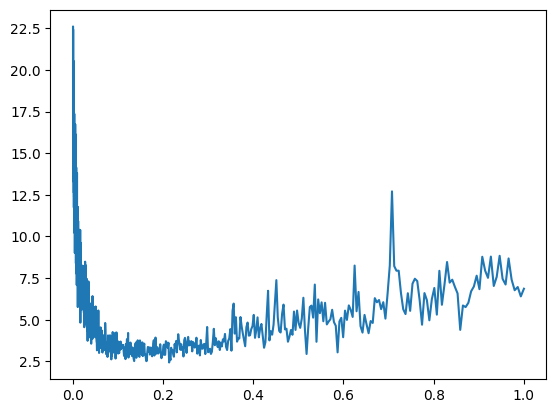

In [122]:
plt.plot(lri, lossi)

In [125]:
lri = []
lossi = []
for i in range(1000):
    # minibatch construct
    ix = torch.randint(0, X.shape[0],(32, ))
    #forward pass
    emb = C[X[ix]] # 32 * 3 * 2
    h = torch.tanh(emb.view(-1,6) @ W1 + b1) # 32 * 100
    logits = h @ W2 + b2 # 32 * 27
    loss = F.cross_entropy(logits, Y[ix])
    lr = lrs[i]
    #backward pass

    for p in parameters:
        p.grad = None
    loss.backward()
    #update
    for p in parameters:
        p.data+=-lr*p.grad
    #track stats
    lri.append(lre[i])
    lossi.append(loss.item())
print(loss.item())

6.180886745452881


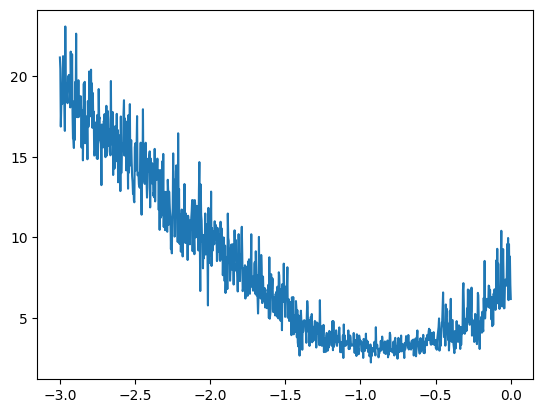

In [126]:
plt.plot(lri, lossi)

In [132]:
lri = []
lossi = []
for i in range(10000):
    # minibatch construct
    ix = torch.randint(0, X.shape[0],(32, ))
    #forward pass
    emb = C[X[ix]] # 32 * 3 * 2
    h = torch.tanh(emb.view(-1,6) @ W1 + b1) # 32 * 100
    logits = h @ W2 + b2 # 32 * 27
    loss = F.cross_entropy(logits, Y[ix])
    lr = 0.1
    #backward pass

    for p in parameters:
        p.grad = None
    loss.backward()
    #update
    for p in parameters:
        p.data+=-lr*p.grad
    #track stats
    # lri.append(lre[i])
    # lossi.append(loss.item())
print(loss.item())

2.492516279220581


In [133]:
emb = C[X] # 32 * 3 * 2
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # 32 * 100
logits = h @ W2 + b2 # 32 * 27
loss = F.cross_entropy(logits, Y)
loss.item()

2.372129201889038

In [135]:
#training split, dev/validation split, test split
# 80 %, 10%, 10%

In [141]:
# build the dataset

def build_dataset(words):
    block_size = 3
    X,Y = [], []
    for w in words:
        context = [0]*block_size
        for ch in w+'.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:]+[ix]
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X,Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))
Xtr,Ytr = build_dataset(words[:n1])
Xdev,Ydev = build_dataset(words[n1:n2])
Xte,Yte = build_dataset(words[n2:])

torch.Size([182437, 3]) torch.Size([182437])
torch.Size([22781, 3]) torch.Size([22781])
torch.Size([22928, 3]) torch.Size([22928])


In [139]:
len(words), n1, n2

(32033, 25626, 23063)

In [142]:
n2-n1 # validation samples

3203

In [143]:
len(words)-n2 # test samples

3204

In [161]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6, 300), generator=g)
b1 = torch.randn(300, generator=g)
W2 = torch.randn((300, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

sum([p.nelement() for p in parameters])

10281

In [171]:
stepi=[]
lossi=[]
for i in range(30000):
    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0],(32, ))
    #forward pass
    emb = C[Xtr[ix]] # 32 * 3 * 2
    h = torch.tanh(emb.view(-1,6) @ W1 + b1) # 32 * 100
    logits = h @ W2 + b2 # 32 * 27
    loss = F.cross_entropy(logits, Ytr[ix])
    lr = 0.01
    #backward pass

    for p in parameters:
        p.grad = None
    loss.backward()
    #update
    for p in parameters:
        p.data+=-lr*p.grad
    
    #track stats
    stepi.append(i)
    lossi.append(loss.item())

print(loss.item())

1.9935590028762817


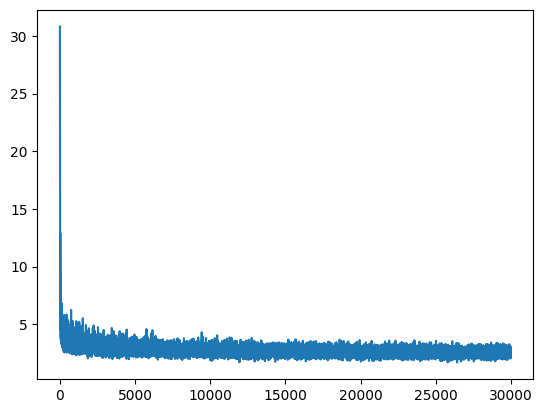

In [163]:
plt.plot(stepi, lossi)

In [173]:
emb = C[Xdev] # 32 * 3 * 2
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # 32 * 100
logits = h @ W2 + b2 # 32 * 27
loss = F.cross_entropy(logits, Ydev)
loss.item()

2.246328592300415

In [174]:
emb = C[Xtr] # 32 * 3 * 2
h = torch.tanh(emb.view(-1,6) @ W1 + b1) # 32 * 100
logits = h @ W2 + b2 # 32 * 27
loss = F.cross_entropy(logits, Ytr)
loss.item()

2.2134766578674316

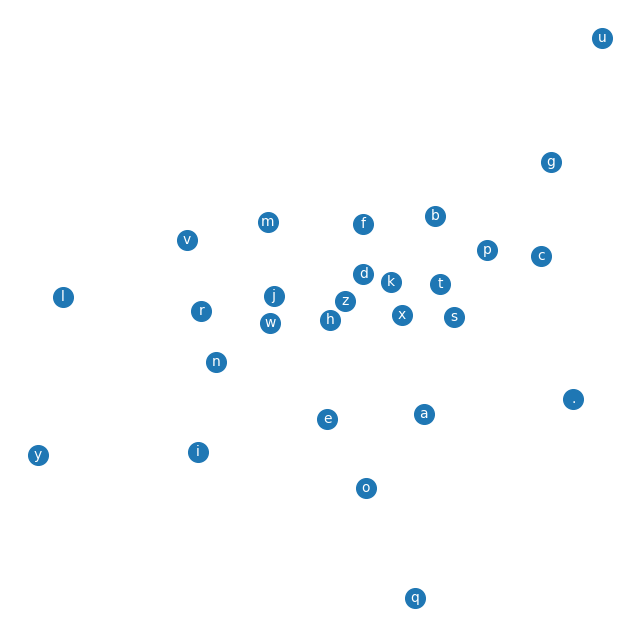

In [177]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:, 1].data , s = 200)
for i in range(C.shape[0]):
    plt.text(C[i, 0].item(), C[i, 1].item(), itos[i], ha='center', va='center', color='white')
plt.axis("off");

In [178]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

sum([p.nelement() for p in parameters])

11897

In [179]:
stepi=[]
lossi=[]

In [192]:
for i in range(50000):
    # minibatch construct
    ix = torch.randint(0, Xtr.shape[0],(32, ))
    #forward pass
    emb = C[Xtr[ix]] # 32 * 3 * 2
    h = torch.tanh(emb.view(-1,30) @ W1 + b1) # 32 * 100
    logits = h @ W2 + b2 # 32 * 27
    loss = F.cross_entropy(logits, Ytr[ix])
    lr = 0.01
    #backward pass

    for p in parameters:
        p.grad = None
    loss.backward()
    #update
    for p in parameters:
        p.data+=-lr*p.grad
    
    #track stats
    stepi.append(i)
    lossi.append(loss.log10().item())

print(loss.item())

1.962083339691162


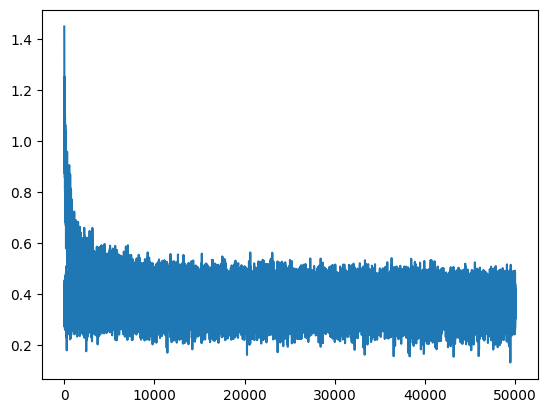

In [186]:
plt.plot(stepi, lossi)

In [193]:
emb = C[Xdev] # 32 * 3 * 2
h = torch.tanh(emb.view(-1,30) @ W1 + b1) # 32 * 100
logits = h @ W2 + b2 # 32 * 27
loss = F.cross_entropy(logits, Ydev)
loss.item()

2.1735668182373047

In [194]:
emb = C[Xtr] # 32 * 3 * 2
h = torch.tanh(emb.view(-1,30) @ W1 + b1) # 32 * 100
logits = h @ W2 + b2 # 32 * 27
loss = F.cross_entropy(logits, Ytr)
loss.item()

2.1084485054016113

In [196]:
g = torch.Generator().manual_seed(2147483647+10)
for _ in range(20):
    out = []
    context = [0]*block_size
    while True:
        emb = C[torch.tensor(context)]
        h = torch.tanh(emb.view(1,-1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:]+[ix]
        out.append(ix)
        if ix == 0:
            break
    print(''.join(itos[i] for i in out))

carmahela.
jharlin.
mili.
taty.
salaysleer.
hube.
deliah.
jareei.
ner.
kiah.
maiir.
kaleigh.
ham.
join.
quinthonovora.
jadii.
wazthoniearyni.
jace.
pius.
toe.
